# DBSCAN
## Density Based Spatial Clusturing of Applications with Noise

In [1]:
# Importing the Libraries

import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN

In [2]:
# Load the data 
df= pd.read_csv ('./penguins.csv')

In [3]:
# separating y
y= df.y

In [4]:
data = df.drop ('y', axis=1)

In [5]:
# Normailizing
datasc= StandardScaler().fit_transform(data)

In [6]:
datasc


array([[-0.88449874,  0.78544923, -1.41834665, -0.56414208],
       [-0.81112573,  0.1261879 , -1.06225022, -0.50170305],
       [-0.66437972,  0.43046236, -0.42127665, -1.18853234],
       ...,
       [ 1.04154272,  0.53188718, -0.56371522, -0.53292256],
       [ 1.26166175,  0.93758646,  0.64701263, -0.1270689 ],
       [ 1.15160224,  0.78544923, -0.20761879, -0.53292256]])

In [7]:
#Converting to df with col names 
datasc_df= pd.DataFrame(datasc,columns= data.columns)

In [8]:
datasc_df

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
0,-0.884499,0.785449,-1.418347,-0.564142
1,-0.811126,0.126188,-1.062250,-0.501703
2,-0.664380,0.430462,-0.421277,-1.188532
3,-1.324737,1.089724,-0.563715,-0.938776
4,-0.847812,1.748985,-0.777373,-0.689020
...,...,...,...,...
337,2.178824,1.343286,0.433355,-0.251947
338,-0.077396,0.481175,0.077258,-1.001215
339,1.041543,0.531887,-0.563715,-0.532923
340,1.261662,0.937586,0.647013,-0.127069


In [9]:
knn= NearestNeighbors(n_neighbors=7) ## Finding the eps value when k=7 with the help of KNN algorithm

In [10]:
knn.fit(datasc_df)

NearestNeighbors(n_neighbors=7)

In [11]:
dist, ind= knn.kneighbors(datasc_df)

In [12]:
# sort the distances
dist= np.sort(dist,axis=0)

In [13]:
dist = dist[:,1] # finding all the minimum distances

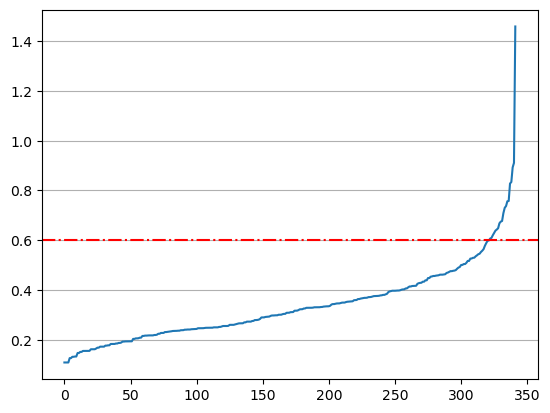

In [14]:
# plot the min distances
plt.plot(dist)
plt.grid(axis='y')
plt.axhline(y=0.6, color='r', ls='-.')

In [15]:
# from this graph we got eps value= 0.6, when the min points are 7

#Lets train DBSCAN
dbscan= DBSCAN(eps=0.6,min_samples=7)

In [16]:
dbscan.fit(datasc_df)

DBSCAN(eps=0.6, min_samples=7)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='bill_length_mm', ylabel='bill_depth_mm'>

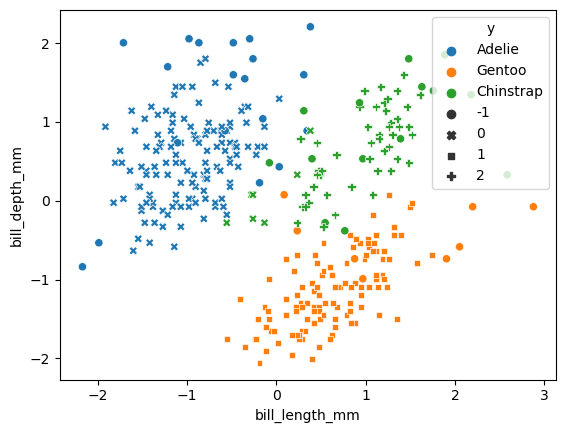

In [17]:
# visualize the clusters
sns.scatterplot(datasc_df['bill_length_mm'],datasc_df['bill_depth_mm'],hue=y,
               style= dbscan.labels_)